[View in Colaboratory](https://colab.research.google.com/github/getmrinal/ML-Notebook/blob/master/19.%20PCA/pcaOnImages_ipnyb.ipynb)

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oli = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /content/scikit_learn_data


In [4]:
oli

{'DESCR': 'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n',
 'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        

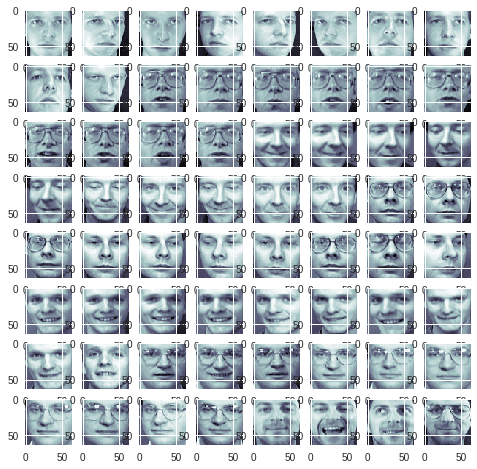

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(oli.images[i],cmap = plt.cm.bone)
plt.show()

In [0]:
x = oli.data
y =oli.target

In [8]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_.shape

(400, 4096)

In [15]:
k = 0
total =sum(pca.explained_variance_)
curr_var  =0

while curr_var/total <0.95:
  curr_var += pca.explained_variance_[k]
  k=k+1
k

123

In [17]:
pca = PCA(n_components=k,whiten=True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [18]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [0]:
x_approx_images = x_approx.reshape((400,64,64))

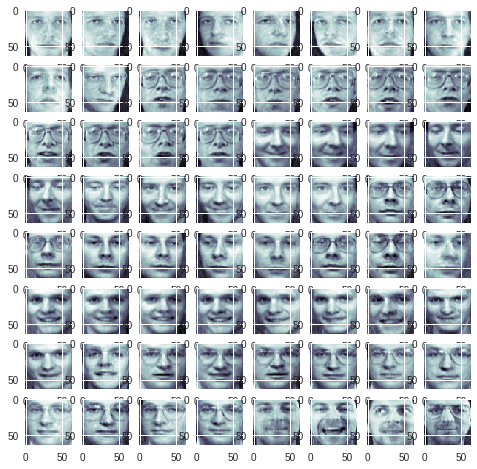

In [21]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(x_approx_images[i],cmap = plt.cm.bone)
plt.show()